In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
df.rename(columns={
    "salary_more_then_100k":"salary"
    
},inplace=True)

In [4]:
df.head()

,company,job,degree,salary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
columns_to_encode=["company","job","degree"]

for col in columns_to_encode:
    df[col]=le.fit_transform(df[col])
    
print("Label Encoding done!!")
le

Label Encoding done!!


LabelEncoder()

In [8]:
df.head()

,company,job,degree,salary
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [9]:
X=df.drop("salary",axis=1)
y=df["salary"]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [13]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_test,y_test)

0.5

In [15]:
pred=model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy=accuracy_score(pred,y_test)
print(f"The model accuracy score is :{accuracy}")

The model accuracy score is :0.5


In [18]:
model.predict([[1,0,1]])

c:\Users\Sahib Chouhan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

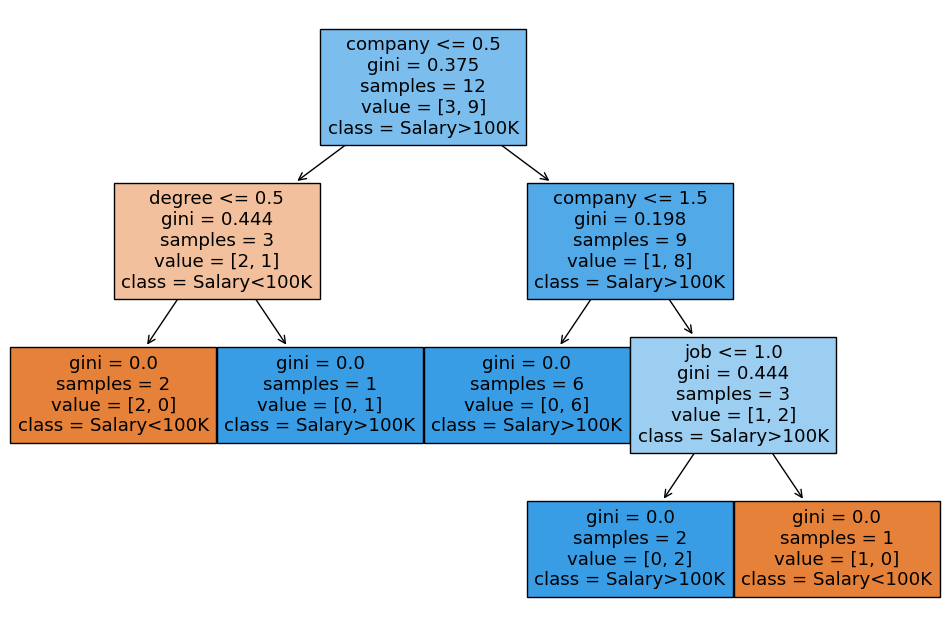

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Salary<100K", "Salary>100K"])

plt.show()
